In [2]:
# Install packages if necessary (only run if packages missing)
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

# plotting defaults
sns.set(style="whitegrid")
%matplotlib inline


In [3]:
# Adjust filename if different
csv_file = "sales_data.csv"
df = pd.read_csv(csv_file)

# Quick preview + info
print("Rows,Cols:", df.shape)
display(df.head())
display(df.info())
# Adjust filename if different
csv_file = "sales_data.csv"
df = pd.read_csv(csv_file)

# Quick preview + info
print("Rows,Cols:", df.shape)
display(df.head())
display(df.info())


Rows,Cols: (10, 10)


,OrderID,OrderDate,CustomerName,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,1001,2024-01-05,John Smith,North,Technology,Laptops,1200,2,0.10,200
1,1002,2024-01-07,Emily Davis,West,Furniture,Chairs,450,4,0.05,80
2,1003,2024-01-10,Michael Lee,South,Office Supplies,Paper,120,10,0.00,30
3,1004,2024-01-12,Sarah Wilson,East,Technology,Phones,800,3,0.15,100
4,1005,2024-01-15,David Brown,North,Furniture,Tables,1500,1,0.20,150


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       10 non-null     int64  
 1   OrderDate     10 non-null     object 
 2   CustomerName  10 non-null     object 
 3   Region        10 non-null     object 
 4   Category      10 non-null     object 
 5   SubCategory   10 non-null     object 
 6   Sales         10 non-null     int64  
 7   Quantity      10 non-null     int64  
 8   Discount      10 non-null     float64
 9   Profit        10 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 932.0+ bytes


None

Rows,Cols: (10, 10)


,OrderID,OrderDate,CustomerName,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,1001,2024-01-05,John Smith,North,Technology,Laptops,1200,2,0.10,200
1,1002,2024-01-07,Emily Davis,West,Furniture,Chairs,450,4,0.05,80
2,1003,2024-01-10,Michael Lee,South,Office Supplies,Paper,120,10,0.00,30
3,1004,2024-01-12,Sarah Wilson,East,Technology,Phones,800,3,0.15,100
4,1005,2024-01-15,David Brown,North,Furniture,Tables,1500,1,0.20,150


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       10 non-null     int64  
 1   OrderDate     10 non-null     object 
 2   CustomerName  10 non-null     object 
 3   Region        10 non-null     object 
 4   Category      10 non-null     object 
 5   SubCategory   10 non-null     object 
 6   Sales         10 non-null     int64  
 7   Quantity      10 non-null     int64  
 8   Discount      10 non-null     float64
 9   Profit        10 non-null     int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 932.0+ bytes


None

In [4]:
# copy to avoid accidental changes
df = df.copy()

# Convert OrderDate to datetime (adjust column name if different)
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Drop rows where OrderDate or Sales are missing
df = df.dropna(subset=['OrderDate','Sales'])

# Remove exact duplicates
df = df.drop_duplicates()

# Add derived columns
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)  # e.g., '2024-01'
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# Save cleaned CSV
cleaned = "cleaned_sales_data.csv"
df.to_csv(cleaned, index=False)
print("Cleaned file saved:", cleaned)
display(df.head())


Cleaned file saved: cleaned_sales_data.csv


,OrderID,OrderDate,CustomerName,Region,Category,SubCategory,Sales,Quantity,Discount,Profit,Year,Month
0,1001,2024-01-05,John Smith,North,Technology,Laptops,1200,2,0.10,200,2024,2024-01
1,1002,2024-01-07,Emily Davis,West,Furniture,Chairs,450,4,0.05,80,2024,2024-01
2,1003,2024-01-10,Michael Lee,South,Office Supplies,Paper,120,10,0.00,30,2024,2024-01
3,1004,2024-01-12,Sarah Wilson,East,Technology,Phones,800,3,0.15,100,2024,2024-01
4,1005,2024-01-15,David Brown,North,Furniture,Tables,1500,1,0.20,150,2024,2024-01


In [5]:
# create a SQLite DB in the same folder
db_file = "sales_db.sqlite"
conn = sqlite3.connect(db_file)
df.to_sql("sales", conn, if_exists="replace", index=False)
print("SQLite DB created:", db_file)
# show tables
print(pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn))


SQLite DB created: sales_db.sqlite
    name
0  sales


In [6]:
# 1) Total Sales by Region
q1 = "SELECT Region, SUM(Sales) AS Total_Sales FROM sales GROUP BY Region ORDER BY Total_Sales DESC;"
region_sales = pd.read_sql_query(q1, conn)
display(region_sales)

# 2) Profit by Category
q2 = "SELECT Category, SUM(Profit) AS Total_Profit FROM sales GROUP BY Category ORDER BY Total_Profit DESC;"
profit_by_cat = pd.read_sql_query(q2, conn)
display(profit_by_cat)

# 3) Top 5 customers by Sales
q3 = "SELECT CustomerName, SUM(Sales) AS Total_Sales FROM sales GROUP BY CustomerName ORDER BY Total_Sales DESC LIMIT 5;"
top_customers = pd.read_sql_query(q3, conn)
display(top_customers)

# 4) Monthly Sales Trend
q4 = "SELECT substr(OrderDate,1,7) AS Month, SUM(Sales) AS Monthly_Sales FROM sales GROUP BY Month ORDER BY Month;"
monthly_sales = pd.read_sql_query(q4, conn)
display(monthly_sales)


,Region,Total_Sales
0,North,4900
1,South,2620
2,West,1250
3,East,1100


,Category,Total_Profit
0,Furniture,650
1,Technology,590
2,Office Supplies,90


,CustomerName,Total_Sales
0,James Anderson,2500
1,Robert Miller,2200
2,David Brown,1500
3,John Smith,1200
4,Sarah Wilson,800


,Month,Monthly_Sales
0,2024-01,9870


In [7]:
os.makedirs("results", exist_ok=True)
region_sales.to_csv("results/region_sales.csv", index=False)
profit_by_cat.to_csv("results/profit_by_category.csv", index=False)
top_customers.to_csv("results/top_customers.csv", index=False)
monthly_sales.to_csv("results/monthly_sales.csv", index=False)
print("Saved query outputs to results/ folder")


Saved query outputs to results/ folder


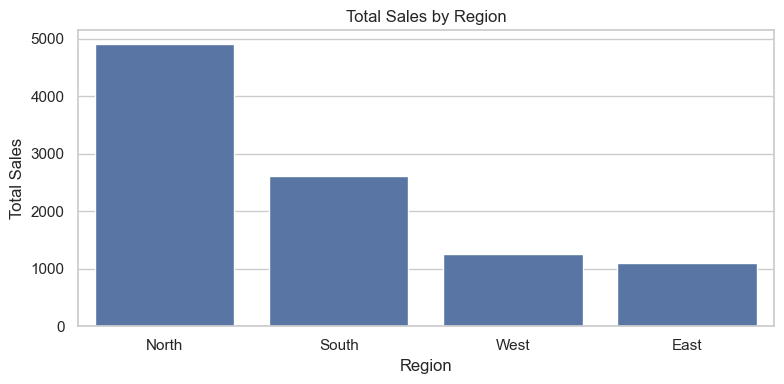

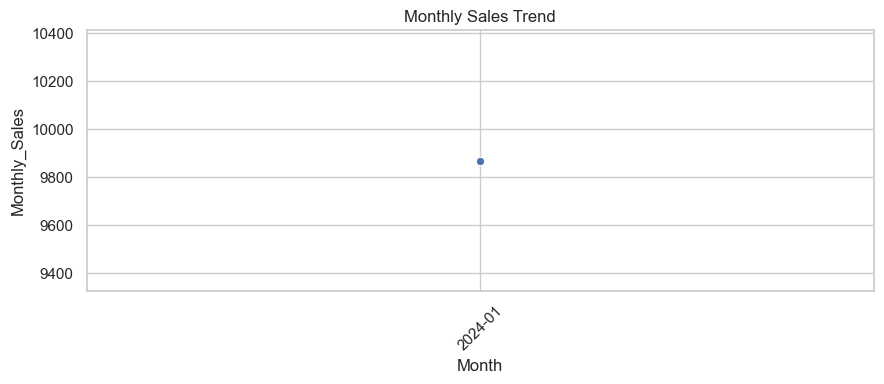

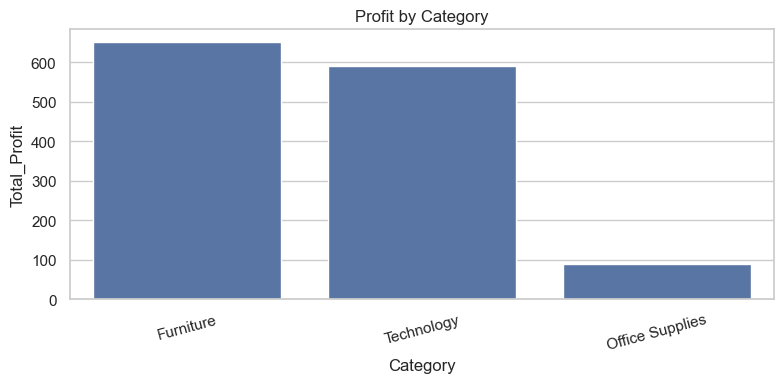

In [8]:
os.makedirs("charts", exist_ok=True)

# Sales by Region (bar)
plt.figure(figsize=(8,4))
sns.barplot(data=region_sales, x='Region', y='Total_Sales')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("charts/sales_by_region.png", dpi=150)
plt.show()

# Monthly trend (line)
plt.figure(figsize=(9,4))
sns.lineplot(data=monthly_sales, x='Month', y='Monthly_Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.savefig("charts/monthly_trend.png", dpi=150)
plt.show()

# Profit by Category
plt.figure(figsize=(8,4))
sns.barplot(data=profit_by_cat, x='Category', y='Total_Profit')
plt.title("Profit by Category")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("charts/profit_by_category.png", dpi=150)
plt.show()
